# **Digital Futures Week 9**
### **Supplementary Python**

##### **0. Introduction**

Lisa is upset that she has no time to talk about data analysis in Python. The task is to cheer her up with a notebook to cover topics on: Pandas, EDA (exploratory data analysis), and visualisation. Hopefully these skills will prove useful when applied to the capstone project and further Data Engineering endeavors. The learning experience will be generated from the following set of instructions:

1. Find and download data to work with
2. Identify and import useful Python libraries
3. Extract data
4. Transform and clean data
5. Load data into the "database" (pickles will be our "database-at-home")
6. EDA and visulisation
7. Business Insight
8. Conclusion

##### **1. Obtain Data**

To obtain some data, we searched Kaggle for data sets. The search yielded these results:
- [Customer Churn Records](<https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn>)
- [Bankruptsy Prediction](<https://www.kaggle.com/datasets/fedesoriano/company-bankruptcy-prediction/data>)
- [Options Trading Data](<https://www.kaggle.com/datasets/bendgame/options-market-trades>)

The data was downloaded and stored locally.

##### **2. Python Libraries**

Pandas was a mandatory requirement to explore. The rest of the libraries seem like they could prove useful for EDA.

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pkl

##### **3. ETL - Extract**

Extraction phase of the data pipeline was executed on the Bankruptcy data set. Retrospectively, running `print(df.head())` was not a good idea. We refer to Lisa's example of the Sky database with 15 thousand columns and 27 million rows.

In [12]:
try:
    df = pd.read_csv('data/CompanyBankruptcyInfo.csv')
    print(f'Dataframe loaded successfully! It has {df.shape[1]} columns and {df.shape[0]} rows.')
    print(f'It is a {type(df)} data type in Python.')
    # print(df.head())
except:
    print('What are you doing??')

Dataframe loaded successfully! It has 96 columns and 6819 rows.
It is a <class 'pandas.core.frame.DataFrame'> data type in Python.


Outside of `df.head()` and `df.tail()`, I learned that there are other ways to make and initial EDA.

- `df.shape` returns a tuple featuring, respectively, the number of rows and number of columns.
- `df.dtypes` returns a new table of column names and column data types.
- `df.columns` returns **ALL** columns - beware!
- `df.describe()` prints summary statistics of **ALL** columns - beware!
- `df.info()` prints... some info? And also amount of memory used.

Uncomment the line you wish to run:

In [13]:
# print(df.shape)
# print(df.dtypes)
print(df.columns)
# df.describe()
# df.info()

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

##### **4. ETL - Transform**

In real business, data cleaning is an essential step to transition unstructured or semi-structured data into a format suitable for structured data. Common steps within data cleaning might include

- Handling or deletion of `NULL` values
- Identifying and removing duplicate data
- Enforcing consistency: dtypes, formatting (dates, capitalisation)

In [14]:
df_clean = df.dropna().drop_duplicates()
message = 'The table remains unchanged.' if df_clean.shape == df.shape else 'Table was cleaned.'
print(message)

The table remains unchanged.


In the above Jupyter cell we attempted to clean the data set by removing `NULL` values and then removing duplicate data. We also verified that the original dataset had no `NULL` values or duplicates and hence the dataframe remains unchanged. I will need Lisa's expert advice on where to get started on further data cleaning (such as enforcing consistency) when I am unable to view the table such as the case where the table has shape `(27 x 10^6, 15 x 10^3)`. Lisa, please help! :)

Some common transformations may include:

- Sorting
- Filtering
- Aggregating

##### **5. ETL - Load**

To explain my choice in database, please allow me to present the following dialogue.

- Child: Mom, can we use the PostgreSQL database?
- Mom: We have the database at home.
- The database at home: `import pickle`

In [15]:
with open('database/bankruptcy_db.pkl', 'wb') as file:
    pkl.dump(df_clean, file)
file.close()

In all seriousness, I believe there are proper ways to load dataframes into a database. A quick Google search yields [this](<https://www.codingforentrepreneurs.com/shorts/export-pandas-dataframe-to-a-postgresql-database-table/>). My decision to not use a database stems from the fear of incurring cost. Other destinations may include services like: AWS RDS (SQL), AWS DynamoDB (NoSQL), AWS Redshift (Data Warehouse), AWS S3 (Data Lake).

##### **6. EDA and Visualisation**

Reading the database:

In [16]:
with open('database/bankruptcy_db.pkl', 'rb') as file:
    db:pd.DataFrame = pkl.load(file)
file.close()

I would assume EDA involves looking at the shape of the database and the summary statistics. Please correct me if I am wrong or have omitted something important.

In [17]:
print(f'Dataframe loaded successfully! It has {db.shape[1]} columns and {db.shape[0]} rows.')
db.describe()

Dataframe loaded successfully! It has 96 columns and 6819 rows.


,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


Let's try to hypothesise that a low operating profit rate is correlated to bankruptsy and test it by producing graphs in Matplotlib.

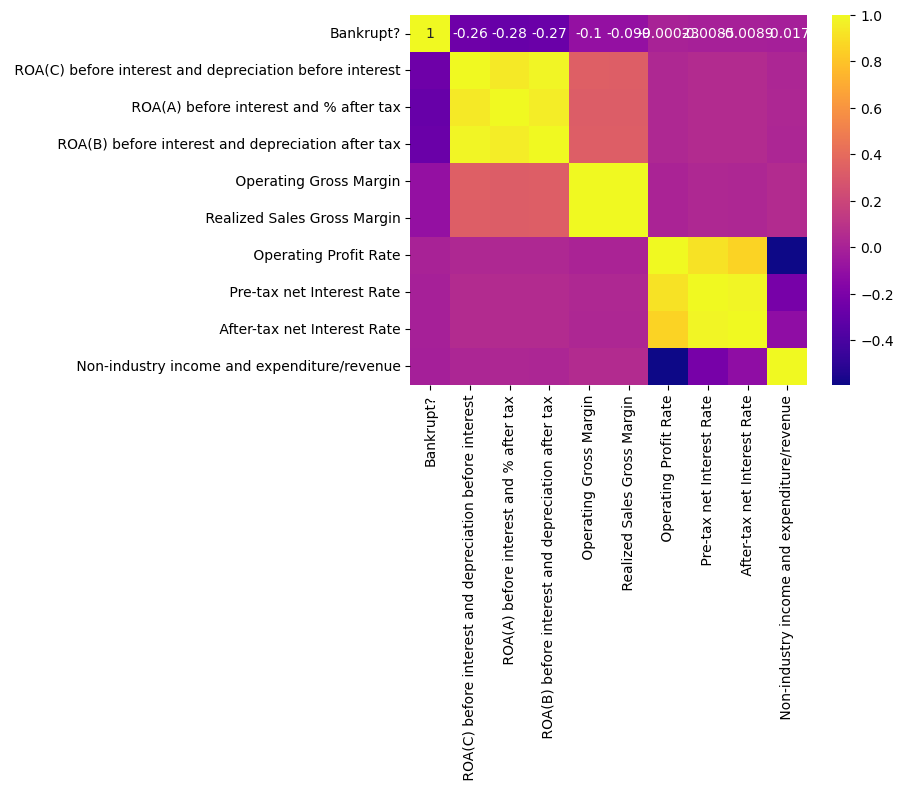

In [18]:
#db.plot(kind='scatter', x=' Operating Profit Growth Rate', y=' Operating Profit Rate')
sns.heatmap(db.iloc[:, :10].corr(), annot=True, cmap='plasma')
plt.show()

##### **7. Business Interpretation**

The data confuses me. Lisa, please help!

##### **8. Conclusion**

It appears that Pandas is Python's natural tool for handling tabular data sets, and Kaggle is a great source of educational data. From a perspective of a Data Engineer, they can use Pandas to construct data pipelines to ETL data from csv files into databases. Moreover, Pandas has built in methods for initial EDA by answering basic questions like

- How big is my table?
- What are the data types of my columns?
- What are the summary statistics of my data?

Visualisation with Matplotlib might also help businesses make data driven decisions.